In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("SMSSpamCollection.tsv",sep="\t",names=["label","text"])
df.head()

In [ ]:
df.shape

In [ ]:
for i in range(10):
    print(df.iloc[i,-1])

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
sn = SnowballStemmer("english")

In [ ]:
nltk.download('stopwords')
stop = stopwords.words ('english')

In [ ]:
nltk.download('punkt')
def clean_text(sms):
    sms = sms.lower()
    sms = re.sub('[^a-z0-9]',' ',sms)
    sms = nltk.word_tokenize(sms)
    sms = [t for t in sms if len(t) > 1]
    sms = [sn.stem(word) for word in sms if word not in stop]
    sms = ' '.join(sms)
    return sms

In [ ]:
clean_text("Get is .. are.. Playing they UNLIMITED <!!!>,,, ??? Free data play 100GB.. at Rs. 0")

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
df.head()

In [ ]:
# pip insatll wordcloud

In [ ]:
from wordcloud import WordCloud

In [84]:
hamdata = df[df['label'] == 'ham']['clean_text']
spamdata = df[df['label'] == 'spam']['clean_text']

In [ ]:
' '.join(hamdata)

In [ ]:
def wordCloud(data):
    words = " ".join(data)
    wc = WordCloud(background_color='white')
    wc = wc.generate(words)

    plt.figure(figsize=(10,8))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

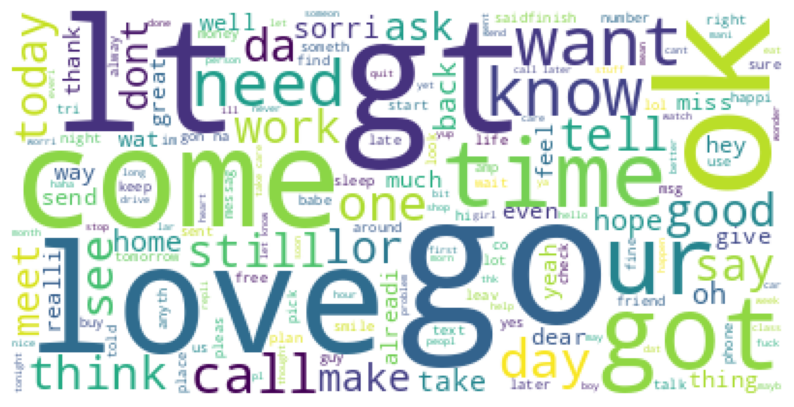

In [85]:
wordCloud(hamdata)

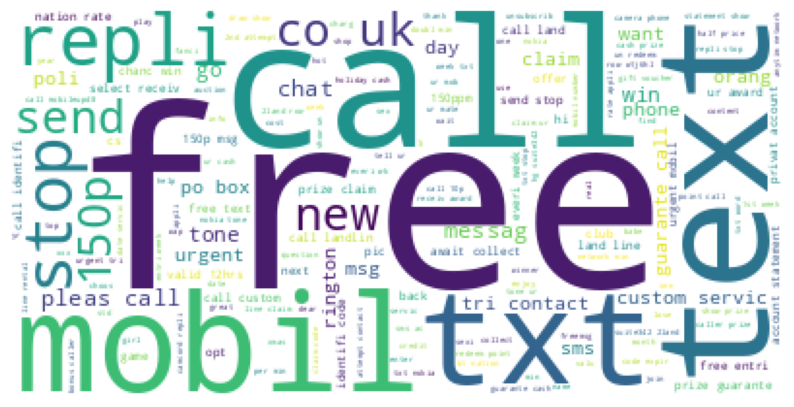

In [83]:
wordCloud(spamdata)